In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load datasets
btc_data = pd.read_csv('BTC_USD.csv')
eth_data = pd.read_csv('ETH_USD.csv')

In [3]:
print("BTC Dataset Sample:")
print(btc_data.head())
print("\nETH Dataset Sample:")
print(eth_data.head())

BTC Dataset Sample:
         Date    Adj Close        Close         High          Low  \
0  2017-01-01   998.325012   998.325012  1003.080017   958.698975   
1  2017-01-02  1021.750000  1021.750000  1031.390015   996.702026   
2  2017-01-03  1043.839966  1043.839966  1044.079956  1021.599976   
3  2017-01-04  1154.729980  1154.729980  1159.420044  1044.400024   
4  2017-01-05  1013.380005  1013.380005  1191.099976   910.416992   

          Open     Volume  
0   963.658020  147775008  
1   998.617004  222184992  
2  1021.599976  185168000  
3  1044.400024  344945984  
4  1156.729980  510199008  

ETH Dataset Sample:
         Date   Adj Close       Close        High         Low        Open  \
0  2017-11-09  320.884003  320.884003  329.451996  307.056000  308.644989   
1  2017-11-10  299.252991  299.252991  324.717987  294.541992  320.670990   
2  2017-11-11  314.681000  314.681000  319.453003  298.191986  298.585999   
3  2017-11-12  307.907990  307.907990  319.153015  298.513000  314.6

In [4]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2889 non-null   object 
 1   Adj Close  2889 non-null   float64
 2   Close      2889 non-null   float64
 3   High       2889 non-null   float64
 4   Low        2889 non-null   float64
 5   Open       2889 non-null   float64
 6   Volume     2889 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 158.1+ KB


BTC data rows after filtering: 2556
ETH data rows after filtering: 2244

Filtered BTC Data Sample:
        Date    Adj Close        Close         High          Low         Open  \
0 2017-01-01   998.325012   998.325012  1003.080017   958.698975   963.658020   
1 2017-01-02  1021.750000  1021.750000  1031.390015   996.702026   998.617004   
2 2017-01-03  1043.839966  1043.839966  1044.079956  1021.599976  1021.599976   
3 2017-01-04  1154.729980  1154.729980  1159.420044  1044.400024  1044.400024   
4 2017-01-05  1013.380005  1013.380005  1191.099976   910.416992  1156.729980   

      Volume  
0  147775008  
1  222184992  
2  185168000  
3  344945984  
4  510199008  

Filtered ETH Data Sample:
        Date   Adj Close       Close        High         Low        Open  \
0 2017-11-09  320.884003  320.884003  329.451996  307.056000  308.644989   
1 2017-11-10  299.252991  299.252991  324.717987  294.541992  320.670990   
2 2017-11-11  314.681000  314.681000  319.453003  298.191986  298.585

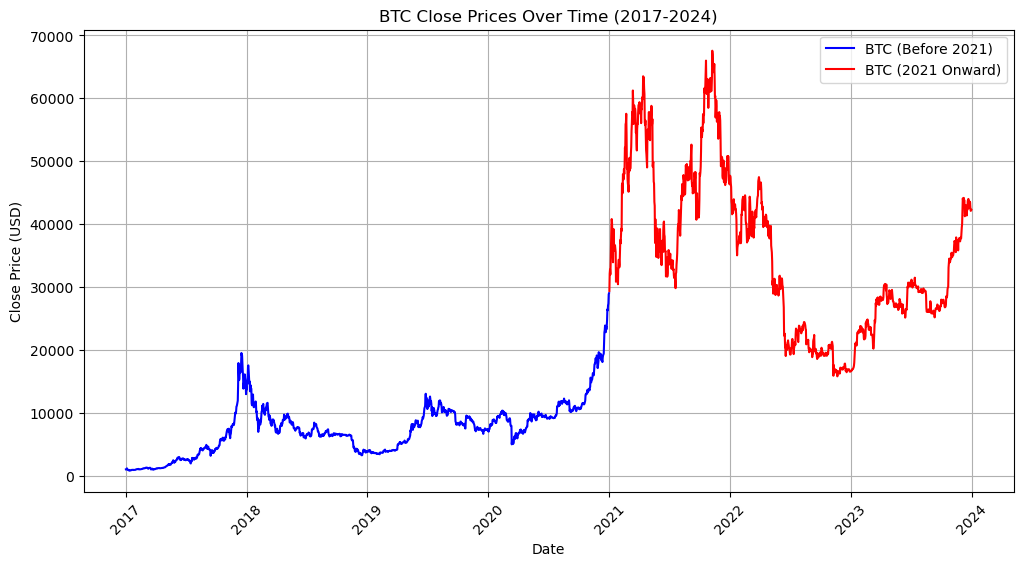

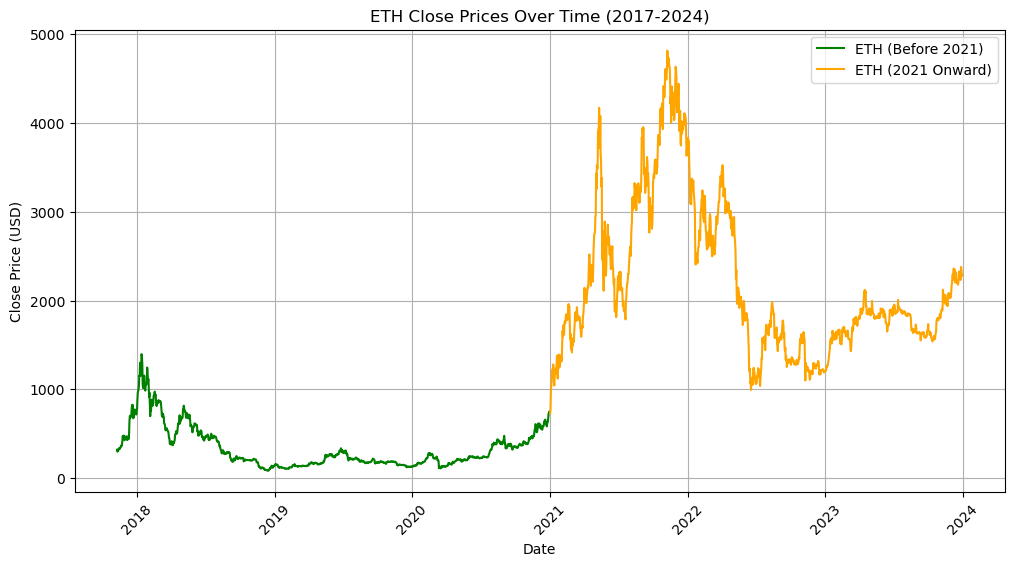

In [5]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
eth_data['Date'] = pd.to_datetime(eth_data['Date'])

btc_data = btc_data[(btc_data['Date'] >= '2017-01-01') & (btc_data['Date'] < '2024-01-01')]
eth_data = eth_data[(eth_data['Date'] >= '2017-01-01') & (eth_data['Date'] < '2024-01-01')]

print(f"BTC data rows after filtering: {len(btc_data)}")
print(f"ETH data rows after filtering: {len(eth_data)}")

print("\nFiltered BTC Data Sample:")
print(btc_data.head())
print("\nFiltered ETH Data Sample:")
print(eth_data.head())


# Plot BTC close prices

plt.figure(figsize=(12, 6))
pre_2021 = btc_data[btc_data['Date'] < '2021-01-01']
post_2021 = btc_data[btc_data['Date'] >= '2021-01-01']
plt.plot(pre_2021['Date'], pre_2021['Close'], label='BTC (Before 2021)', color='blue')
plt.plot(post_2021['Date'], post_2021['Close'], label='BTC (2021 Onward)', color='red')
plt.title('BTC Close Prices Over Time (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Plot ETH close prices
plt.figure(figsize=(12, 6))
pre_2021 = eth_data[eth_data['Date'] < '2021-01-01']
post_2021 = eth_data[eth_data['Date'] >= '2021-01-01']
plt.plot(pre_2021['Date'], pre_2021['Close'], label='ETH (Before 2021)', color='green')
plt.plot(post_2021['Date'], post_2021['Close'], label='ETH (2021 Onward)', color='orange')
plt.title('ETH Close Prices Over Time (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

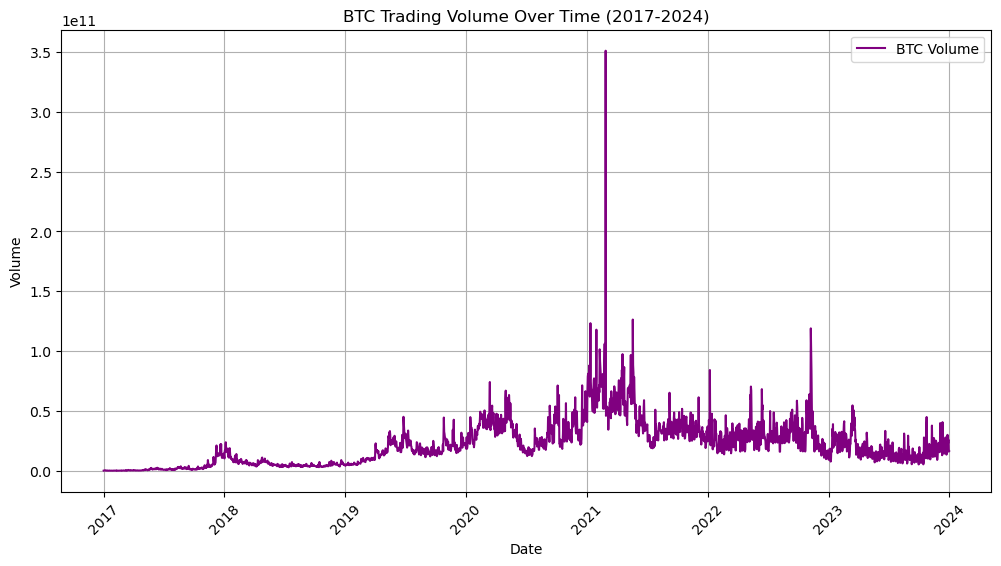

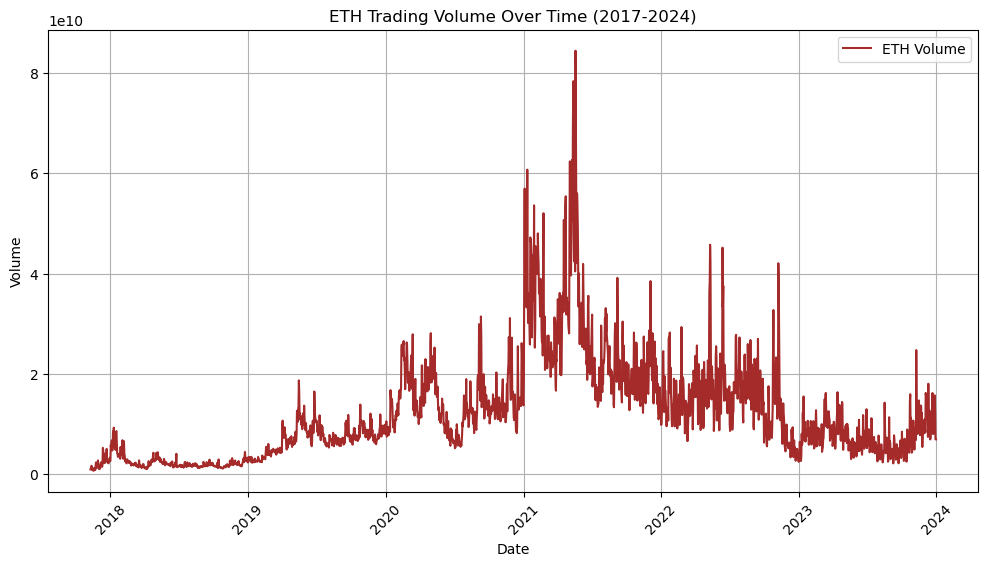

In [6]:
# Plot BTC Volume
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Volume'], label='BTC Volume', color='purple')
plt.title('BTC Trading Volume Over Time (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Plot ETH Volume
plt.figure(figsize=(12, 6))
plt.plot(eth_data['Date'], eth_data['Volume'], label='ETH Volume', color='brown')
plt.title('ETH Trading Volume Over Time (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()



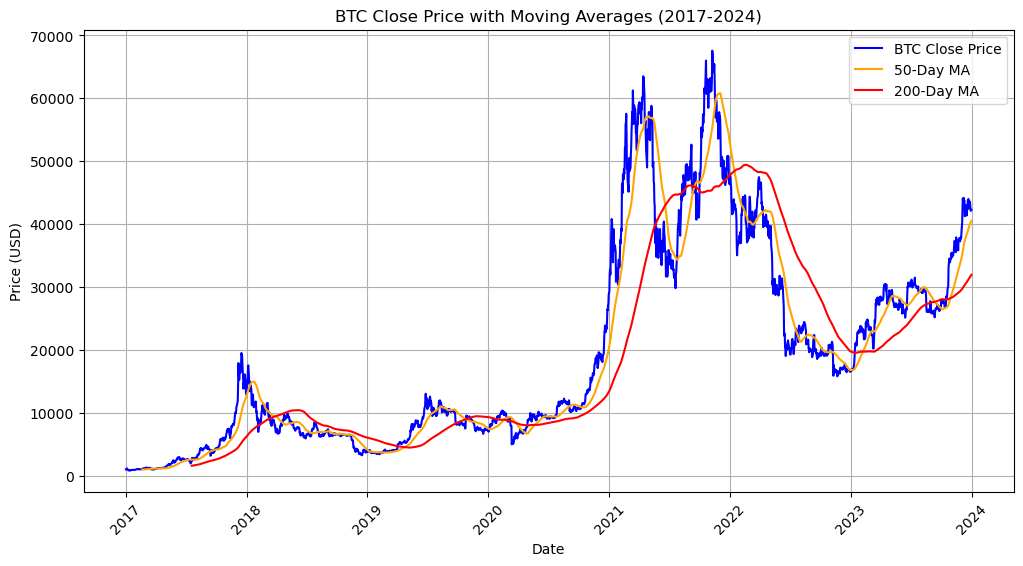

In [7]:
# Add moving averages for BTC
btc_data['MA_50'] = btc_data['Close'].rolling(window=50).mean()
btc_data['MA_200'] = btc_data['Close'].rolling(window=200).mean()

# Plot BTC with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='BTC Close Price', color='blue')
plt.plot(btc_data['Date'], btc_data['MA_50'], label='50-Day MA', color='orange')
plt.plot(btc_data['Date'], btc_data['MA_200'], label='200-Day MA', color='red')
plt.title('BTC Close Price with Moving Averages (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


Correlation between BTC and ETH Close Prices: 0.9242279444533577


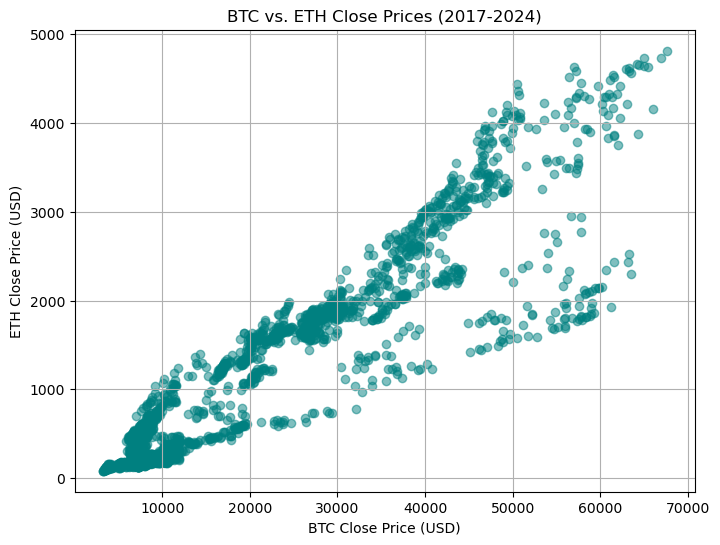

In [8]:
# Calculate correlation
merged_data = pd.merge(btc_data[['Date', 'Close']], eth_data[['Date', 'Close']], on='Date', suffixes=('_BTC', '_ETH'))
correlation = merged_data['Close_BTC'].corr(merged_data['Close_ETH'])
print(f"Correlation between BTC and ETH Close Prices: {correlation}")

# Scatter plot of BTC vs. ETH
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Close_BTC'], merged_data['Close_ETH'], alpha=0.5, color='teal')
plt.title('BTC vs. ETH Close Prices (2017-2024)')
plt.xlabel('BTC Close Price (USD)')
plt.ylabel('ETH Close Price (USD)')
plt.grid()
plt.show()

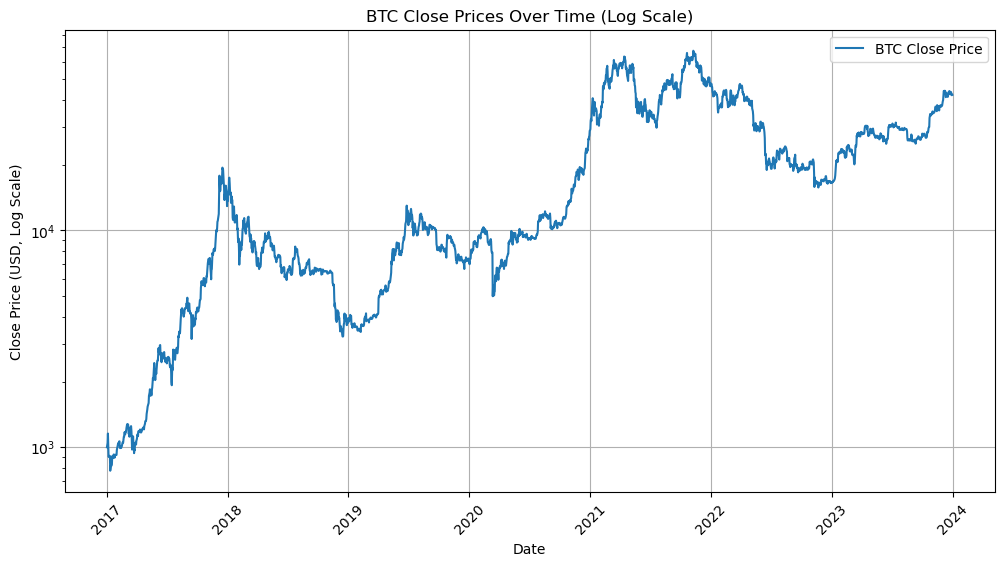

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='BTC Close Price')
plt.yscale('log')
plt.title('BTC Close Prices Over Time (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD, Log Scale)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

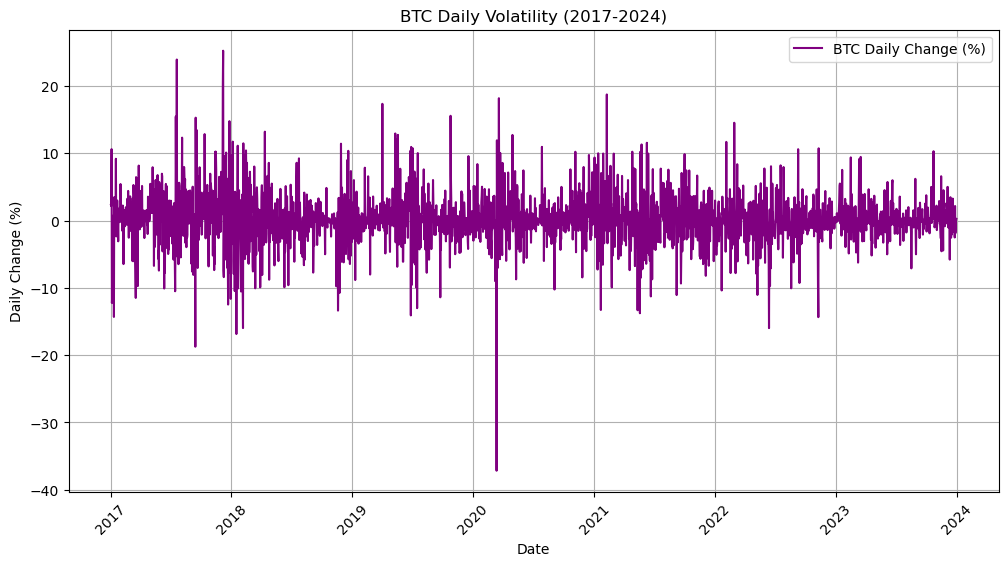

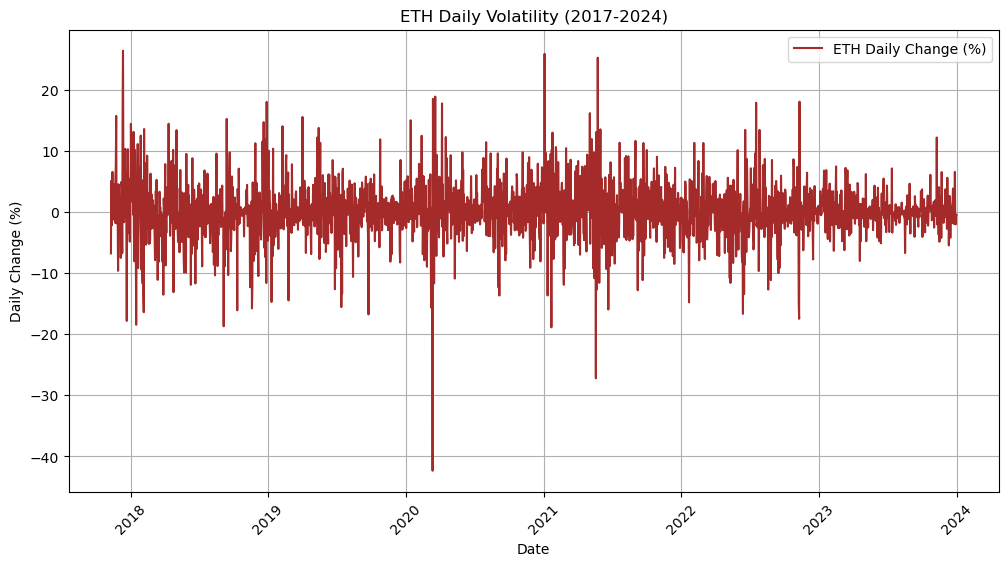

In [10]:
btc_data['Daily Change (%)'] = btc_data['Close'].pct_change() * 100
eth_data['Daily Change (%)'] = eth_data['Close'].pct_change() * 100

# Plot BTC Volatility
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Daily Change (%)'], label='BTC Daily Change (%)', color='purple')
plt.title('BTC Daily Volatility (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Daily Change (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Plot ETH Volatility
plt.figure(figsize=(12, 6))
plt.plot(eth_data['Date'], eth_data['Daily Change (%)'], label='ETH Daily Change (%)', color='brown')
plt.title('ETH Daily Volatility (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Daily Change (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


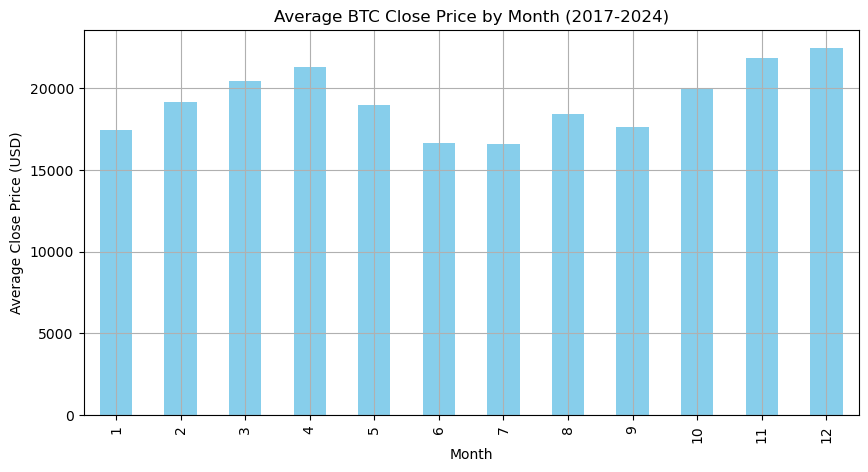

In [11]:
btc_data['Month'] = btc_data['Date'].dt.month
monthly_avg = btc_data.groupby('Month')['Close'].mean()

# Plot monthly averages
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average BTC Close Price by Month (2017-2024)')
plt.xlabel('Month')
plt.ylabel('Average Close Price (USD)')
plt.grid()
plt.show()
